<a href="https://colab.research.google.com/github/pratikiiitb2013/EVA_public/blob/master/Session6/Assignment_6A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

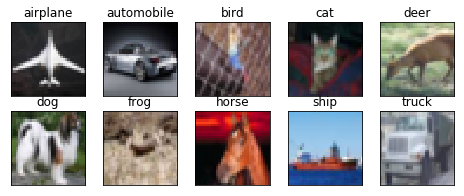

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0614 14:07:18.749957 140102046414720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0614 14:07:18.763839 140102046414720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0614 14:07:18.766366 140102046414720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':
W0614 14:07:19.224216 140102046414720 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and wil

Epoch 1/100
390/390 [==============================] - 12s 31ms/step - loss: 1.8470 - acc: 0.2929 - val_loss: 1.4195 - val_acc: 0.4656
Epoch 2/100
390/390 [==============================] - 9s 23ms/step - loss: 1.3444 - acc: 0.5094 - val_loss: 1.1281 - val_acc: 0.5945
Epoch 3/100
390/390 [==============================] - 9s 23ms/step - loss: 1.1340 - acc: 0.5982 - val_loss: 1.0122 - val_acc: 0.6372
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 0.9910 - acc: 0.6523 - val_loss: 0.8871 - val_acc: 0.6888
Epoch 5/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8919 - acc: 0.6896 - val_loss: 0.7780 - val_acc: 0.7339
Epoch 6/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8185 - acc: 0.7194 - val_loss: 0.8151 - val_acc: 0.7197
Epoch 7/100
390/390 [==============================] - 9s 22ms/step - loss: 0.7616 - acc: 0.7391 - val_loss: 0.7119 - val_acc: 0.7605
Epoch 8/100
390/390 [==============================] - 9s 23m

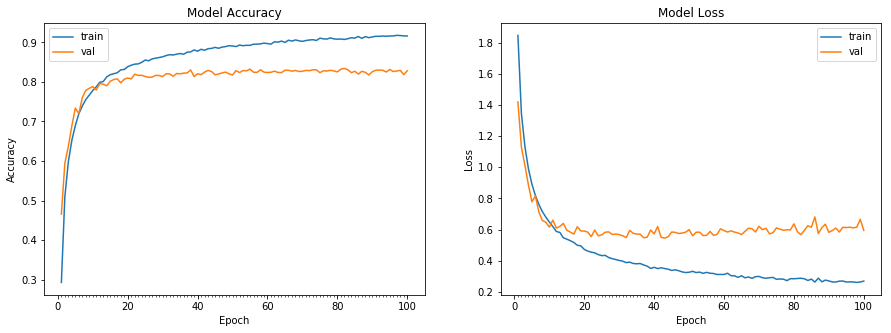

Accuracy on test data is: 82.81


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Corrected the architecture by - 
* Added layers to reach the receptive field
* Removed dense layers
* Added 4 blocks of 50-100-200 conv layers.(Kernel scale-up and scale-down)
* In Each block added padding, so that network architecture follows cake like structure.
* Reduced channel size through max pooling.
* Reduced #channels through 1x1
* Added batch norm and dropouts at right place
* Played with learning rate to improve accuracy
* Base accuracy is - 82%
* Improved accuracy - 88%

In [0]:
# Define the model
my_model = Sequential()
my_model.add(Convolution2D(50, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
my_model.add(Activation('relu'))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.25))
my_model.add(Convolution2D(100, 3, 3, border_mode='same'))
my_model.add(Activation('relu'))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.25))
my_model.add(Convolution2D(200, 3, 3, border_mode='same'))
my_model.add(Activation('relu'))
my_model.add(BatchNormalization())
my_model.add(MaxPooling2D(pool_size=(2, 2)))
my_model.add(Convolution2D(50, 1))
my_model.add(Activation('relu'))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.25))
my_model.add(Convolution2D(100, 3, 3, border_mode='same'))
my_model.add(Activation('relu'))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.25))
my_model.add(Convolution2D(200, 3, 3, border_mode='same'))
my_model.add(Activation('relu'))
my_model.add(BatchNormalization())
my_model.add(MaxPooling2D(pool_size=(2, 2)))
my_model.add(Convolution2D(50, 1))
my_model.add(Activation('relu'))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.25))
my_model.add(Convolution2D(100, 3, 3, border_mode='same'))
my_model.add(Activation('relu'))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.25))
my_model.add(Convolution2D(200, 3, 3, border_mode='same'))
my_model.add(Activation('relu'))
my_model.add(BatchNormalization())
my_model.add(MaxPooling2D(pool_size=(2, 2)))
my_model.add(Convolution2D(50, 1))
my_model.add(Activation('relu'))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.25))
my_model.add(Convolution2D(100, 3, 3, border_mode='same'))
my_model.add(Activation('relu'))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.25))
my_model.add(Convolution2D(200, 3, 3, border_mode='same'))
my_model.add(Activation('relu'))
my_model.add(BatchNormalization())
my_model.add(Convolution2D(20, 1))
my_model.add(Activation('relu'))
my_model.add(BatchNormalization())
my_model.add(Convolution2D(num_classes, 4))
my_model.add(Flatten())
my_model.add(Activation('softmax'))
# Compile the model
my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0614 14:22:05.646047 140102046414720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(100, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(200, (3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(100, (3, 3), padding="same")`
/usr/local/lib/

In [0]:
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 50)        1400      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 50)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 50)        200       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 50)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 100)       45100     
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 100)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 100)       400       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
  from ipykernel import kernelapp as app


Epoch 1/100

Epoch 00001: LearningRateScheduler setting learning rate to 0.0075.
390/390 [==============================] - 41s 105ms/step - loss: 1.5816 - acc: 0.4251 - val_loss: 1.5968 - val_acc: 0.4794
Epoch 2/100

Epoch 00002: LearningRateScheduler setting learning rate to 0.0056861259.
390/390 [==============================] - 38s 97ms/step - loss: 1.1142 - acc: 0.5974 - val_loss: 1.1892 - val_acc: 0.6052
Epoch 3/100

Epoch 00003: LearningRateScheduler setting learning rate to 0.0045787546.
390/390 [==============================] - 37s 94ms/step - loss: 0.9144 - acc: 0.6745 - val_loss: 0.8368 - val_acc: 0.7048
Epoch 4/100

Epoch 00004: LearningRateScheduler setting learning rate to 0.0038323965.
390/390 [==============================] - 37s 94ms/step - loss: 0.7823 - acc: 0.7219 - val_loss: 0.9188 - val_acc: 0.6814
Epoch 5/100

Epoch 00005: LearningRateScheduler setting learning rate to 0.0032952548.
390/390 [==============================] - 37s 94ms/step - loss: 0.6976 - acc:

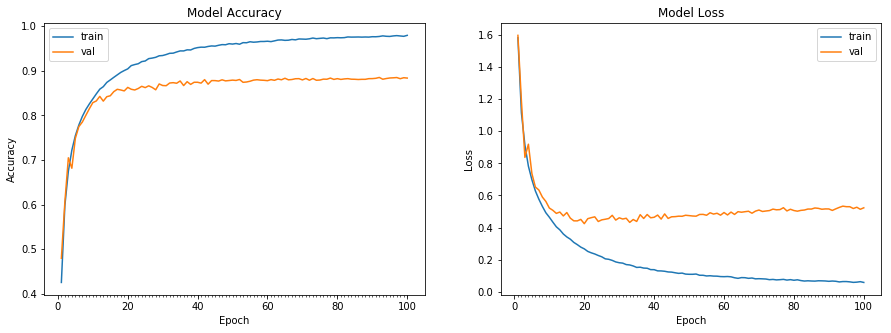

Accuracy on test data is: 88.37


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.0075 * 1/(1 + 0.319 * epoch), 10)

# train the model
start = time.time()
# Train the model
my_model_info = my_model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(my_model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, my_model))